In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame

ill = pd.read_csv('Illinois_2.csv')
ill.head()

,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BorrID,LoanStatus,GrossApproval,SBAGuarantee,InterestRate,...,NaicsCode,NaicsDescription,JobsSupported,DeliveryMethod,subpgmdesc,BankName,BankStreet,BankCity,BankState,BankZip
0,"MetalStamp, Inc.",24219 NORTHERN ILLINOIS DRIVE,CHANNAHON,IL,60410,6388,EXEMPT,1730000,1297500,5.75,...,332116,Metal Stamping,50,OTH 7A,Guaranty,First American Bank,700 Busse Rd,ELK GROVE VILLAGE,IL,60007
1,Phillip M. Palella D.D.S. P.C.,2033 W Division St,CHICAGO,IL,60622,10922,PIF,176600,88300,7.00,...,621210,Offices of Dentists,23,SBA EXPRES,FA$TRK (Small Loan Express),"JPMorgan Chase Bank, National Association",1111 Polaris Pkwy,COLUMBUS,OH,43240
2,"PINOY TURO-TURO, INC",1800 FAXON DR,MONTGOMERY,IL,60538,98,CHGOFF,30500,15250,9.00,...,722110,Full-Service Restaurants,10,SBA EXPRES,FA$TRK (Small Loan Express),"JPMorgan Chase Bank, National Association",1111 Polaris Pkwy,COLUMBUS,OH,43240
3,"TURNER BAILEY, INC.",410 BROADWAY,SOUTH ROXANA,IL,62037,164,CHGOFF,800000,600000,6.00,...,562910,Remediation Services,45,OTH 7A,Guaranty,Providence Bank,3855 Forum Blvd,COLUMBIA,MO,65203
4,KB TRUCK REPAIR INC.,3641 HIGHWAY 111,PONTOON BEACH,IL,62040,8691,PIF,505000,378750,6.00,...,811310,Commercial and Industrial Machinery and Equipm...,18,OTH 7A,Guaranty,United Community Bank,301 N Main St,CHATHAM,IL,62629


In [3]:
ill =ill.dropna()

In [4]:
# Use Pandas get_dummies to convert categorical data

### BEGIN SOLUTION
ill = pd.get_dummies(ill)
ill.head()
### END SOLUTION

,BorrZip,BorrID,GrossApproval,SBAGuarantee,InterestRate,TermMonths,ApprovalFiscalYear,Status,COFiscalYear,COAmount,...,BankState_NC,BankState_NE,BankState_NY,BankState_OH,BankState_OR,BankState_RI,BankState_SD,BankState_TX,BankState_UT,BankState_WI
2,60538,98,30500,15250,9.00,41,2010,1,2014.0,19740.0,...,0,0,0,1,0,0,0,0,0,0
3,62037,164,800000,600000,6.00,67,2010,1,2015.0,313222.0,...,0,0,0,0,0,0,0,0,0,0
12,62701,319,125000,106250,6.00,43,2010,1,2016.0,72391.0,...,0,0,0,0,0,0,0,0,0,0
17,60564,219,180000,135000,5.50,48,2010,1,2015.0,145158.0,...,0,0,0,0,0,0,0,0,0,0
26,60302,64,50000,25000,6.25,33,2010,1,2013.0,31821.0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
# Assign X (data) and y (target)

### BEGIN SOLUTION
X = ill[['COAmount', 'GrossApproval', 'TermMonths', 'ApprovalFiscalYear', 'COFiscalYear']]
y = ill["SBAGuarantee"].values.reshape(-1, 1)
print(X.shape, y.shape)
### END SOLUTION

(483, 5) (483, 1)


In [53]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [54]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

/Users/fjgalliano/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [55]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

/Users/fjgalliano/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [56]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

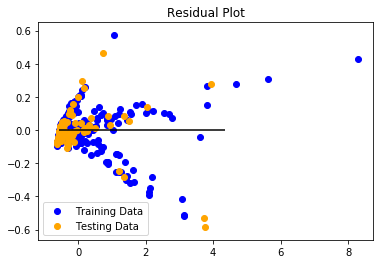

In [57]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [58]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.012236414473897343, R2: 0.9820810789848007


In [59]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.01242372511445288, R2: 0.9818067825738235


In [60]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.012240766631266642, R2: 0.9820747057155468


In [61]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.012986931810742978, R2: 0.9809820265697193


In [74]:
# Assign X (data) and y (target)

### BEGIN SOLUTION 2
X = ill[['SBAGuarantee', 'GrossApproval', 'Status']]
y = ill["COAmount"].values.reshape(-1, 1)
print(X.shape, y.shape)
### END SOLUTION

(483, 3) (483, 1)


In [75]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [76]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [77]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [78]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

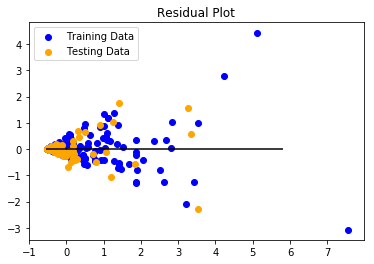

In [79]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [80]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.14719096337966422, R2: 0.770116669096345


In [81]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.14882623768655653, R2: 0.7675626923033546


In [82]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.1472372043791359, R2: 0.7700444497512251


In [83]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.15246645958740718, R2: 0.7618773817613108
